In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/w4_dataset/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


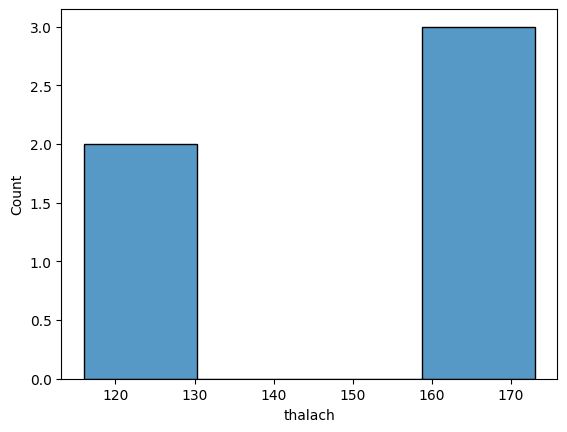

In [10]:
inx = np.random.permutation(np.arange(0,1026))[0:5]

sns.histplot(df['thalach'][inx])
plt.show()

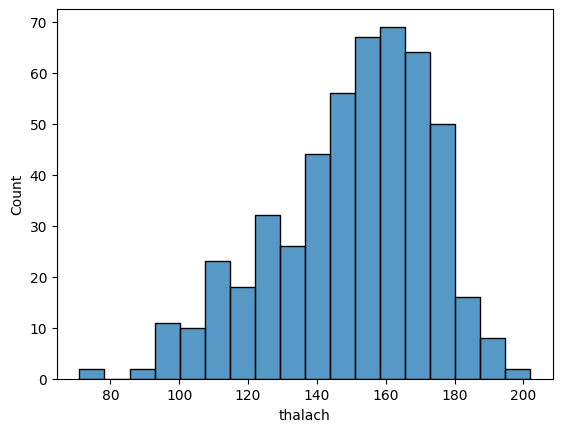

In [13]:
inx = np.random.permutation(np.arange(0,1026))[0:500]

sns.histplot(df['thalach'][inx])
plt.show()

In [ ]:
# 샘플수가 작을 때는 추출한 표본의 분산이 다르게 나타난다. -> 데이터 분석 의미x
# 샘플수가 30이상일때는 분산이 정규분포와 유사하게 나타나기 시작한다
# 샘플수가 충분히 클 때 모수의 분포를 따르게 된다

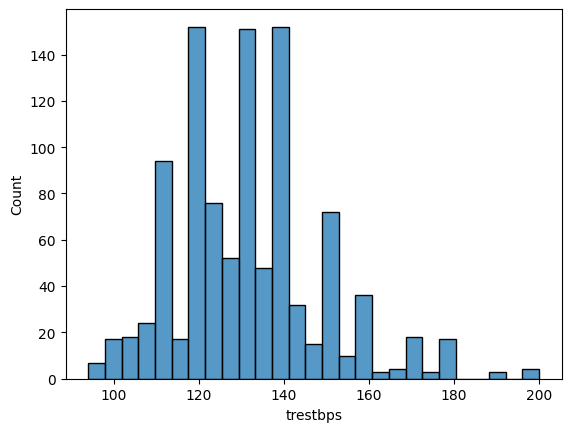

In [14]:
sns.histplot(df['trestbps']) # 혈압
plt.show()

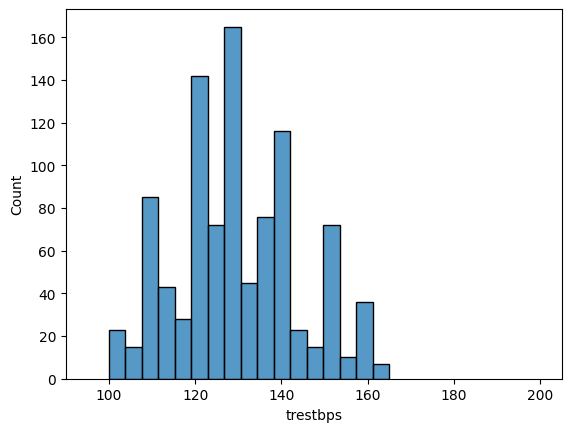

In [19]:
mu = np.mean(df['trestbps'])
std = np.std(df['trestbps'])
z_score = 1.96
high = mu + z_score*std
low = mu - z_score*std

d = df.where( (df['trestbps']<high) & (df['trestbps']>low) )
sns.histplot(d['trestbps'])
plt.xlim((90,205))
plt.show()

In [ ]:
# IQR을 이용한 이상치 제거

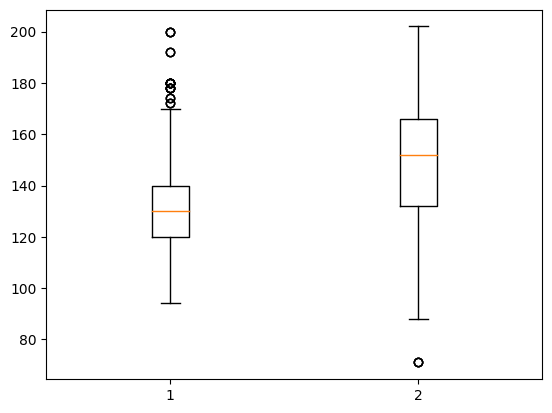

In [20]:
plt.boxplot([df['trestbps'], df['thalach']])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd429c862b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd429cd6310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd429c79fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd429c86c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd429c86eb0>],
 'means': []}

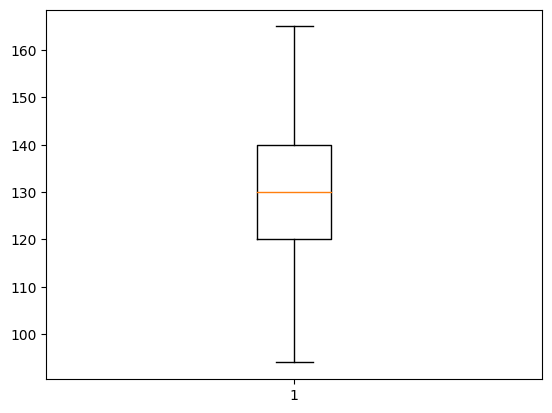

In [22]:
q1 = df['trestbps'].quantile(0.25)
q2 = df['trestbps'].quantile(0.5)
q3 = df['trestbps'].quantile(0.75)

iqr = q3 - q1

condition = ( (df['trestbps']<(q3+1.5*iqr)) & (df['trestbps']>(q1-1.5*iqr)) )
plt.boxplot(df['trestbps'][condition])

In [ ]:
# 실습 4

# 여러 사람의 신상정보와 연봉에 관하여 조사를 진행하였고, 이 데이터를 기반으로 신상정보를 넣으면 연봉을 예측해주는 모델을 만들고자 한다.
# 이때 조사한 데이터에 이상치가 섞여 있으면 모델이 큰 영향을 받으므로 이상치를 확인하고 제거하고자 한다.


In [24]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/w4_dataset/Placement_data_full_class.csv')
df.sample(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
33,34,F,87.0,Others,65.0,Others,Science,81.0,Comm&Mgmt,Yes,88.0,Mkt&Fin,72.78,Placed,260000.0
108,109,M,61.0,Central,82.0,Central,Commerce,69.0,Comm&Mgmt,No,84.0,Mkt&Fin,58.31,Placed,300000.0
156,157,M,84.2,Central,69.4,Central,Science,65.0,Sci&Tech,Yes,80.0,Mkt&HR,52.72,Placed,255000.0
12,13,F,47.0,Central,55.0,Others,Science,65.0,Comm&Mgmt,No,62.0,Mkt&HR,65.04,Not Placed,NaN
63,64,M,61.0,Others,70.0,Others,Commerce,64.0,Comm&Mgmt,No,68.5,Mkt&HR,59.50,Not Placed,NaN


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [26]:
mu = np.mean(df['salary'])
std = np.std(df['salary'])

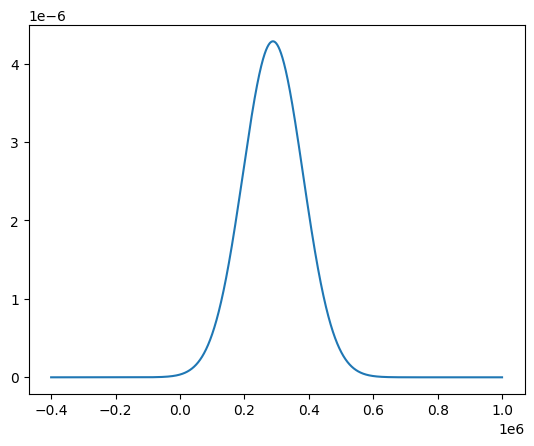

In [29]:
from scipy.stats import norm
x = np.arange(-400000, 1e+6, 1)
plt.plot(x, norm.pdf(x, mu, std))

<Axes: xlabel='salary', ylabel='Count'>

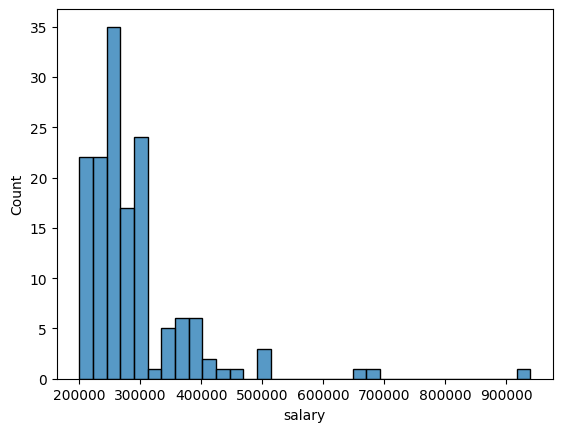

In [30]:
sns.histplot(df['salary'])

(150000.0, 1000000.0)

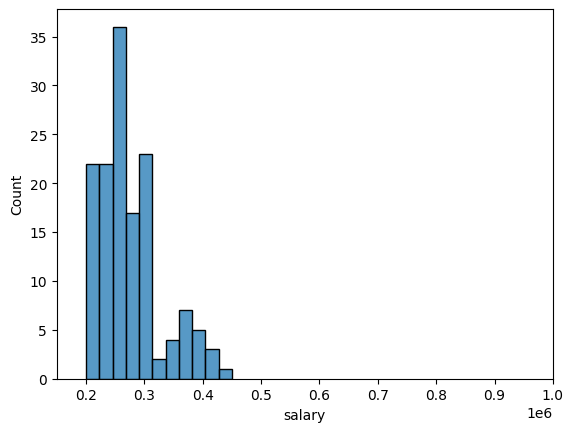

In [32]:
mu = np.mean(df['salary'])
std = np.std(df['salary'])
z_score = 1.96
high = mu + z_score*std
low = mu - z_score*std

d = df.where( (df['salary']<high) & (df['salary']>low) )

sns.histplot(d['salary'])
plt.xlim([150000, 1000000])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd429946250>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd429946790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd429938f70>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd429946cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd429946f70>],
 'means': []}

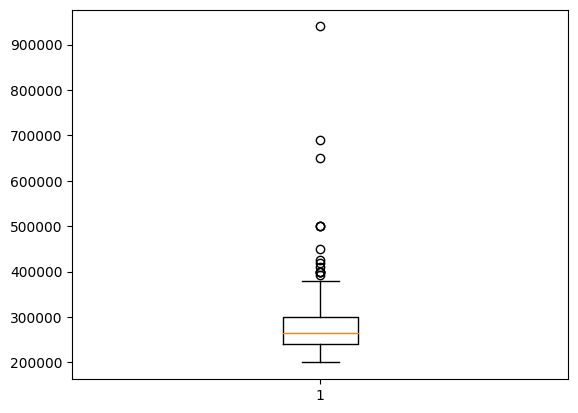

In [33]:
plt.boxplot(df[df['salary'].isnull() != True]['salary'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd4298abd30>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd42983a2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd4298aba90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd42983a7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd42983aa90>],
 'means': []}

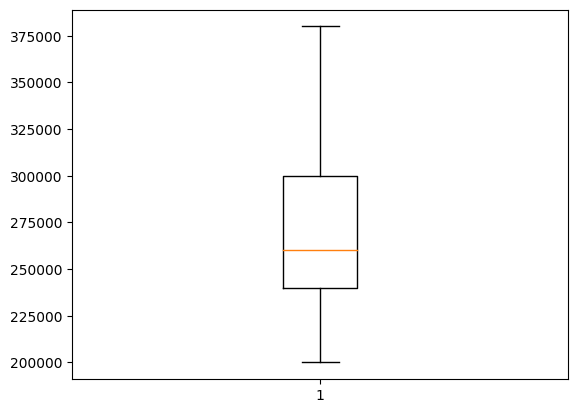

In [35]:
q1 = df['salary'].quantile(0.25)
q2 = df['salary'].quantile(0.5)
q3 = df['salary'].quantile(0.75)

iqr = q3 - q1

condition = ( (df['salary']<(q3 + 1.5*iqr)) & (df['salary']>(q1-1.5*iqr)) )
plt.boxplot(df[condition]['salary'])

(150000.0, 1000000.0)

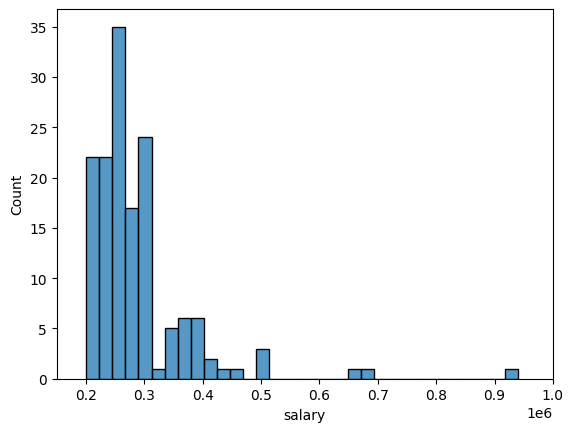

In [36]:
sns.histplot(df['salary'])
plt.xlim([150000, 1000000])

(150000.0, 1000000.0)

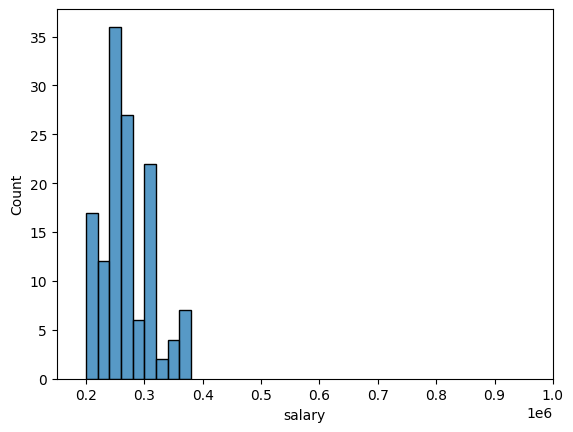

In [37]:
sns.histplot(df[condition]['salary'])
plt.xlim([150000, 1000000])